/var/folders/ss/8jmv74q91hx88tdtr0hdx12c0000gn/T/ipykernel_73739/505861590.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  omega2s[count] = pert.sigma2()


0.2 0.0 -1.3638953818346461e-05
0.2 0.0 -5.507681916612054e-05
0.2 0.0 -0.00012564996341488582
0.2 0.0 -0.00022752644113756184
0.2 0.0 -0.0003638800948338922
0.2 0.0 -0.0005391613966901683
0.2 0.0 -0.0007595136091169872
0.2 0.0 -0.0010334190774085796
0.2 0.0 -0.0013727289922101482
0.2 0.0 -0.001794367950579389
0.2 0.0 -0.002323303439393308
0.2 0.0 -0.0029980771623361823
0.2 0.0 -0.0038820654610757822
0.2 0.0 -0.005089377311588209
0.2 0.0 -0.0068560038010283455
0.2 0.0 -0.009800103628560458
0.2 0.0 -0.016612540108934717
0.19995081196823744 -0.0016203853961427853 -0.01415877134314891
0.19996116868397876 -0.003256206607277717 -0.01192506656373514
0.2001247889550312 -0.004637673842248588 -0.010548779423149829
0.20043503420685138 -0.0058109390422778065 -0.00955962673372798
0.20087660668866192 -0.006811980790723574 -0.008798887561789596
0.20143391921186615 -0.007669357811017619 -0.008191953520403526
0.20209280832766596 -0.008406040492165132 -0.0076970466644577075
0.202840852107872 -0.0090407

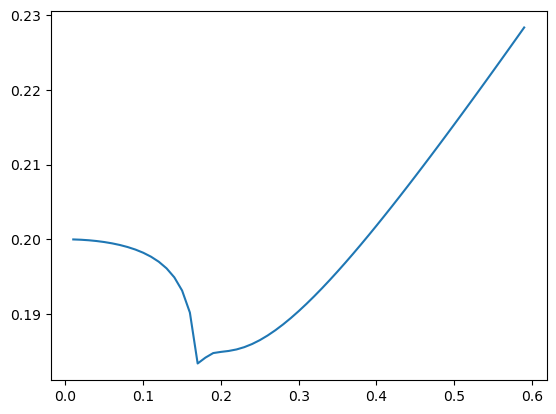

In [6]:
import numpy as np
import os
import utils
from grid import Grid
from params import Params
from gs import groundstate
from exc import excitations
from vert import vertices
from pert import perturbative
from plotting import plot2D, plot_cns, plot_omega0
import matplotlib.pyplot as plt

config_path = "config.yml" 

output_dir = utils.create_output_dir()

config = utils.read_config(config_path)

Lx = config["grid"]["Lx"]
Ly = config["grid"]["Ly"]

N = config["physics"]["N"]
dJUs = np.arange(**config["lists"]["dJUs"])
muU = eval(config["physics"]["muU"])
UIB = config["physics"]["UIB"]
cutoff = config["physics"]["cutoff"]

grid = Grid(Lx, Ly)

omega0s = np.zeros(len(dJUs))
omega1s = np.zeros(len(dJUs))
omega2s = np.zeros(len(dJUs))
omegas = np.zeros((len(dJUs), 3))
for count in range(len(dJUs)):
    dJU = dJUs[count]
    params = Params(N, dJU, muU, UIB, cutoff)
    # print(params.muU)
    gs = groundstate(params)
    cns = gs.cns()
    n0 = gs.n0(cns)
    # print(n0)
    exc = excitations(grid, params, gs, cns)
    uks, vks, omegaklambda = exc.calculate_matrices()
    verts = vertices(grid, gs, uks, vks, cns, n0)
    pert = perturbative(grid, params, verts, omegaklambda)
    omega0s[count] = pert.sigma0(n0)
    omega1s[count] = pert.sigma1()
    omega2s[count] = pert.sigma2()
    print(omega0s[count], omega1s[count], omega2s[count])
#     omega0s[count] = omegaklambda[1][5][5]
#     omega1s[count] = omegaklambda[2][5][5]
#     omega2s[count] = omegaklambda[3][5][5]
# omegas[:, 0] = omega0s
# omegas[:, 1] = omega1s
# omegas[:, 2] = omega2s
# plot_omega0(
#     omegas,
#     r"$2\delta J/U$",
#     r"$\omega_{\lambda}(|\vec{k}| = 0)$", show=True
# )
plt.plot(dJUs, omega0s + omega1s + omega2s, label=r"$\omega_{0}$")
plt.show()
# plt.plot(dJUs, omega1s, label=r"$\omega_{0}$")
# plt.show()



0.17157287525381
dJU =  0.01 muU =  0.41421356237309515
dJU =  0.02 muU =  0.41421356237309515
dJU =  0.03 muU =  0.41421356237309515
dJU =  0.04 muU =  0.41421356237309515
dJU =  0.05 muU =  0.41421356237309515
dJU =  0.06 muU =  0.41421356237309515
dJU =  0.07 muU =  0.41421356237309515
dJU =  0.08 muU =  0.41421356237309515
dJU =  0.09 muU =  0.41421356237309515
dJU =  0.1 muU =  0.41421356237309515
dJU =  0.11 muU =  0.41421356237309515
dJU =  0.12 muU =  0.41421356237309515
dJU =  0.13 muU =  0.41421356237309515
dJU =  0.14 muU =  0.41421356237309515
dJU =  0.15 muU =  0.41421356237309515
dJU =  0.16 muU =  0.41421356237309515
dJU =  0.17 muU =  0.41421356237309515
0.35000000000000003 0.9952158904377947
0.35100000000000003 0.9953541832586352
0.35200000000000004 0.9954893094623175
0.35300000000000004 0.9956213162530037
0.35400000000000004 0.9957502510305047
0.35500000000000004 0.9958761613873358
0.35600000000000004 0.9959990951056792
0.35700000000000004 0.9961191001542682
0.3580000

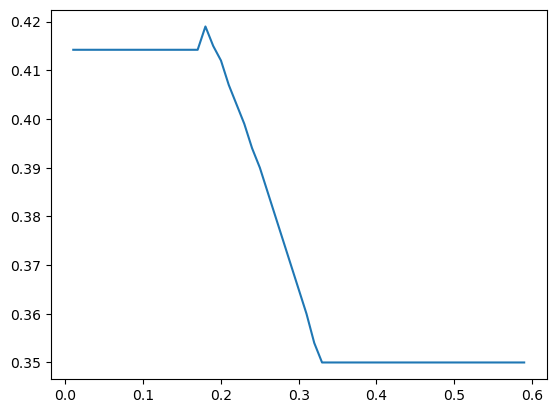

In [38]:
# Write a code that calculates muU for a given sigma0

muU_qcorr = np.zeros(len(dJUs))
dJUmax = (np.sqrt(2) - 1)**2
print(dJUmax)
# start with large values of dJU and decrease it 
for count in range(len(dJUs)):
    dJU = dJUs[count]
    found = False
    muU = 0.4
    if(dJU < dJUmax):
        muU = np.sqrt(2) - 1
    else:
        muU = muU - 0.015
        while((muU < 0.5) and (not found)): # change muU until 1 - pert.sigma0(n0) / UIB = 0
            params = Params(N, dJU, muU, UIB, cutoff)
            gs = groundstate(params)
            cns = gs.cns()
            n0 = gs.n0(cns)
            exc = excitations(grid, params, gs, cns)
            uks, vks, omegaklambda = exc.calculate_matrices()
            verts = vertices(grid, gs, uks, vks, cns, n0)
            pert = perturbative(grid, params, verts, omegaklambda)
            eq = pert.sigma0(n0) / UIB
            print(muU,eq)
            if(1 - eq < 0.0001):
                found = True
                break
            muU += 0.0001
    
    muU_qcorr[count] = muU
    print("dJU = ", dJU, "muU = ", muU_qcorr[count])

plt.plot(dJUs, muU_qcorr, label=r"$\omega_{0}$")
plt.show()



In [39]:
print(dJUs, muU_qcorr)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59] [0.41421356 0.41421356 0.41421356 0.41421356 0.41421356 0.41421356
 0.41421356 0.41421356 0.41421356 0.41421356 0.41421356 0.41421356
 0.41421356 0.41421356 0.41421356 0.41421356 0.41421356 0.419
 0.415      0.412      0.407      0.403      0.399      0.394
 0.39       0.385      0.38       0.375      0.37       0.365
 0.36       0.354      0.35       0.35       0.35       0.35
 0.35       0.35       0.35       0.35       0.35       0.35
 0.35       0.35       0.35       0.35       0.35       0.35
 0.35       0.35       0.35       0.35       0.35       0.35
 0.35       0.35       0.35       0.35       0.35      ]


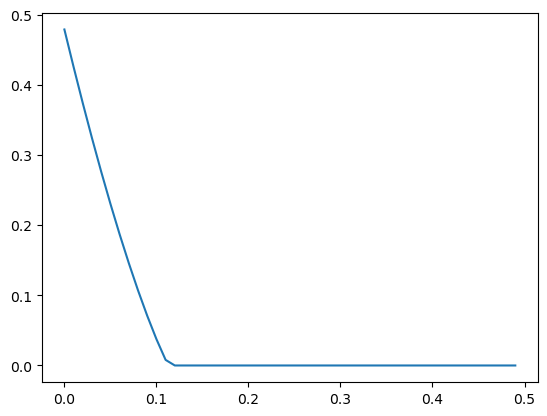

In [32]:
# Write a code that calculates muU for a given sigma0
muU = 0.5
muU_qcorr = np.zeros(len(dJUs))
# start with large values of dJU and decrease it 
for count in range(8, 9):
    dJU = dJUs[count]
    found = False
    muU = muU + 0.01
    muUs = np.arange(0., 0.5, 0.01)
    eqs = np.zeros(len(muUs))
    for u in range(len(muUs)):
        muU = muUs[u]
        params = Params(N, dJU, muU, UIB, cutoff)
        # print(params.muU)
        gs = groundstate(params)
        cns = gs.cns()
        n0 = gs.n0(cns)
        exc = excitations(grid, params, gs, cns)
        uks, vks, omegaklambda = exc.calculate_matrices()
        verts = vertices(grid, gs, uks, vks, cns, n0)
        pert = perturbative(grid, params, verts, omegaklambda)
        eq = pert.sigma0(n0) / UIB
        eqs[u] = eq

plt.plot(muUs, 1 - eqs, label=r"$\omega_{0}$")


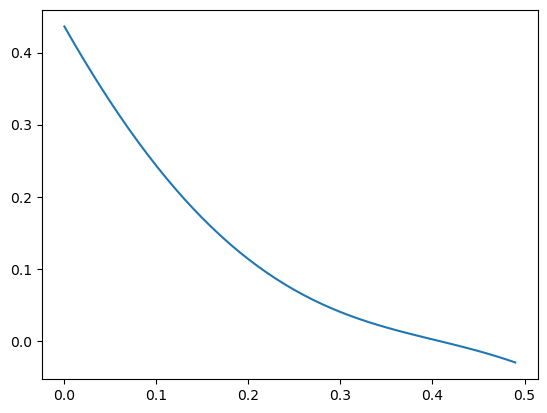

In [25]:
plt.plot(muUs, 1 - eqs, label=r"$\omega_{0}$")